# Exploring Marches (DECP) Data

In [1]:
import pandas as pd
import psycopg2
import configparser
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Initiate a connection to Redshift
using a local config file

In [2]:
config = configparser.ConfigParser()
project_config_path = '/Users/paulogier/Library/Preferences/PyCharm2019.3/scratches/capstone.cfg'
config.read(project_config_path)
DWH_HOST = config.get("DB", "DB_HOST")
DWH_DB = config.get("DB", "DB_NAME")
DWH_DB_USER = config.get("DB", "DB_USER")
DWH_DB_PASSWORD = config.get("DB", "DB_PASSWORD")
DWH_PORT = config.get("DB", "DB_PORT")
conn = psycopg2.connect(host =DWH_HOST ,database = DWH_DB, user=DWH_DB_USER, password=DWH_DB_PASSWORD, port=DWH_PORT)
conn.autocommit = True
print(conn.status)

1


## Exploring marches

In [3]:
marches = pd.read_sql('SELECT * FROM dwh.decp_marches;', conn)

In [4]:
marches.sample(5)

,decp_uid,source,decp_id,type,nature,procedure,objet,codecpv,dureemois,datenotification,datepublicationdonnees,montant,formeprix,acheteur_id,acheteur_name
94014,130016421000132020151021303200,data.gouv.fr_aife,2020151021303200,Marché,Marché,None,"Pièces pour pompes, compresseurs, machines ou ...",42124000,1,2020-09-30,2020-09-30,1063.50,Ferme,13001642100013,Ministère des armées - Structure Spécialisée d...
154118,2659067350001320192020T0531100,data.gouv.fr_aife,20192020T0531100,Marché,Marché,Appel d'offres ouvert,Le marché est composé de 10 lots. 2181 lot 7 :...,45000000,41,2019-12-11,2019-12-11,61629.78,Ferme et actualisable,26590673500013,CH VALENCIENNES
133275,214502346000152019V1935000,data.gouv.fr_pes,2019V1935000,Marché,Marché,Procédure adaptée,V19350 REMPLACEMENT TGBT 2 CENTRE MUNICIPAL,31214500-4,4,2019-08-21,2019-08-29,68316.62,Révisable,21450234600015,VILLE D'ORLEANS
219400,34749837000027201914900,marches-publics.info,201914900,Marché,Marché,Procédure adaptée,19DC001 TALENSAC « Rue du Centre » - 11 logeme...,71200000,36,2019-07-08,2019-07-08,72072.00,Ferme,34749837000027,NEOTOA
149323,218201218000112019190040900,marches-publics.info,2019190040900,Marché,Marché,Procédure adaptée,Numéro de la consultation : 19/004 <br />EXTEN...,45261000,15,2019-06-21,2019-06-27,78596.00,Révisable,21820121800011,VILLE DE MONTAUBAN


### Number of rows

In [5]:
marches.shape[0]

232648

### null values

In [6]:
(marches.isnull().sum(axis=0)/marches.shape[0]).sort_values(ascending=False)

procedure                 0.047196
formeprix                 0.020611
datenotification          0.010956
nature                    0.006503
acheteur_name             0.003563
codecpv                   0.002729
acheteur_id               0.001272
montant                   0.000920
objet                     0.000524
decp_id                   0.000077
datepublicationdonnees    0.000017
dureemois                 0.000000
type                      0.000000
source                    0.000000
decp_uid                  0.000000
dtype: float64

### Primary Key

In [7]:
if marches['decp_uid'].nunique()/marches.shape[0] ==1:
    print('decp_uid has unique values')

decp_uid has unique values


### Amount

In [8]:
marches['montant'].describe()

count    2.324340e+05
mean     1.015810e+08
std      2.940726e+10
min      0.000000e+00
25%      3.164703e+04
50%      8.420000e+04
75%      2.410000e+05
max      1.000000e+13
Name: montant, dtype: float64

Some marches have a value of 100 million euros, which is probably a typo.    
Some marches have null values

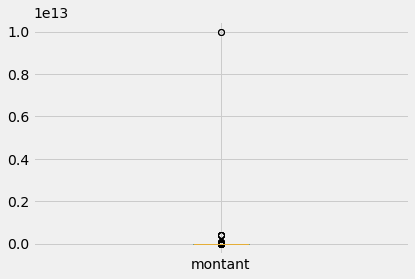

In [9]:
marches['montant'].plot(kind='box');

The picture confirms the outlier status of the points > 100 million euros

In [10]:
marches.loc[marches['montant']>= 10**8]

,decp_uid,source,decp_id,type,nature,procedure,objet,codecpv,dureemois,datenotification,datepublicationdonnees,montant,formeprix,acheteur_id,acheteur_name
119,1100020110004420202021T0490000,data.gouv.fr_aife,20202021T0490000,Marché,Marché,Appel d'offres ouvert,Le projet consiste en la mise à 2x2 voies de l...,45233100,576,2020-03-15,2020-03-15,3.952233e+09,Ferme,11000201100044,"Ministère de la Transition Écologique, Ministè..."
703,1300017040058920202020T0266800,data.gouv.fr_aife,20202020T0266800,Marché,Accord-cadre,Appel d'offres ouvert,Travaux d'entretien des chaussées de la DIR Ouest,45233139,48,2020-03-05,2020-03-05,1.000000e+08,None,13000170400589,Ministère de la Transition écologique et solid...
1408,1300017040058920202020T0266700,data.gouv.fr_aife,20202020T0266700,Marché,Accord-cadre,Appel d'offres ouvert,Travaux d'entretien des chaussées de la DIR Ouest,45233139,48,2020-03-05,2020-03-05,1.000000e+08,None,13000170400589,Ministère de la Transition écologique et solid...
1463,1300019020001920202020T0679200,data.gouv.fr_aife,20202020T0679200,Marché,Accord-cadre,None,"Conception, Construction, Aménagement, Entreti...",45212410,48,2020-06-17,2020-06-17,1.020000e+08,Révisable,13000190200019,Ministère des armées - Service d'Infrastructur...
2048,1300022230002720202021S0247400,data.gouv.fr_aife,20202021S0247400,Marché,Accord-cadre,Appel d'offres ouvert,GCS UniHA - Marché public de maintenance en im...,50421000,72,2020-12-20,2020-12-20,4.296000e+08,None,13000222300027,GCS UNIHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231121,7760564670058720192019F2523500,data.gouv.fr_aife,20192019F2523500,Marché,Accord-cadre,Appel d'offres ouvert,Véhicules de transport en commun de type autob...,34121000,48,2019-12-09,2019-12-09,1.717088e+08,Révisable,77605646700587,Département Assistanat Achat
231631,7760564670058720202020S1484200,data.gouv.fr_aife,20202020S1484200,Marché,Accord-cadre,None,Services d’informatique en nuage (IaaS / PaaS),72500000,48,2020-01-23,2020-01-23,2.500000e+08,Révisable,77605646700587,Union des Groupements d'Achats Publics - Dépar...
231647,7760564670058720182019F0600200,data.gouv.fr_aife,20182019F0600200,Marché,Accord-cadre,Appel d'offres ouvert,Fourniture d'éléments d'infrastructures inform...,48822000,48,2018-12-10,2018-12-10,2.040000e+08,Révisable,77605646700587,Union des Groupements d'Achats Publics -
231650,7760564670058720192019F2523300,data.gouv.fr_aife,20192019F2523300,Marché,Accord-cadre,Appel d'offres ouvert,Véhicules de transport en commun de type autob...,34121000,48,2019-12-09,2019-12-09,1.817088e+08,Révisable,77605646700587,Union des Groupements d'Achats Publics - Dépar...


100 million euros for a routine infrastructure project? Or buses? I keep those value in the reporting value as it highlights data quality issues, and could be legit, but would also include a flag "suspicious amount"

In [11]:
marches.loc[marches['montant']==0]

,decp_uid,source,decp_id,type,nature,procedure,objet,codecpv,dureemois,datenotification,datepublicationdonnees,montant,formeprix,acheteur_id,acheteur_name
783,1300015300033120182020S0858500,data.gouv.fr_aife,20182020S0858500,Marché,Accord-cadre,Appel d'offres ouvert,Prestations de gestion de flotte pour véhicule...,50111100,48,2018-07-20,2018-07-20,0.0,Révisable,13000153000331,Ministère de la Transition Écologique et Solid...
1380,1300050100002520182020F0290300,atexo-maximilien,20182020F0290300,Marché,Accord-cadre,Appel d'offres ouvert,"Fourniture, la mise en service et la maintenan...",33152000,48,2018-11-05,2018-11-05,0.0,Révisable,13000501000025,RESEAUX DES ACHETEURS HOSPITALIERS
1383,1300050100002520192020F0278100,atexo-maximilien,20192020F0278100,Marché,Accord-cadre,Appel d'offres ouvert,L’acquisition et/ou la location avec option d’...,33100000,48,2019-06-12,2019-06-12,0.0,Ferme et actualisable,13000501000025,RESEAUX DES ACHETEURS HOSPITALIERS
1855,1300050100002520182020F0271800,atexo-maximilien,20182020F0271800,Marché,Accord-cadre,Appel d'offres ouvert,Lot 6 - Serviettes périodiques - Fourniture de...,33771100,48,2018-07-30,2018-07-30,0.0,Révisable,13000501000025,RESEAUX DES ACHETEURS HOSPITALIERS
1858,1300050100002520192020F0274200,atexo-maximilien,20192020F0274200,Marché,Accord-cadre,Appel d'offres ouvert,"Fourniture de produits surgelés, de potages dé...",15000000,48,2019-03-26,2019-03-26,0.0,Révisable,13000501000025,RESEAUX DES ACHETEURS HOSPITALIERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232024,7834366600002220194SG1RuS4ky00,data.gouv.fr_aife,20194SG1RuS4ky00,Marché,Marché,Procédure adaptée,20190611 3204-Rev�tements de sols,45000000,8,2019-09-18,2019-10-22,0.0,Révisable,78343666000022,VOSGELIS
232027,783436660000222019fn9ZRCSvNc00,data.gouv.fr_aife,2019fn9ZRCSvNc00,Marché,Marché,Procédure adaptée,20190221 3143-ASSAINISSEMENT,45000000,999,2019-06-27,2019-10-22,0.0,Ferme,78343666000022,VOSGELIS
232088,8349834390001120192020S0027400,atexo-maximilien,20192020S0027400,Marché,Accord-cadre,Procédure adaptée,La présente consultation a pour objet de concl...,79417000,48,2019-01-21,2019-01-21,0.0,Ferme,83498343900011,PARIS 2024
232380,775665599001292019hToZm4SeD900,data.gouv.fr_aife,2019hToZm4SeD900,Marché,Accord-cadre,Procédure adaptée,2019-130 -2019-130 : R�daction des comptes ren...,79551000,12,2019-08-09,2019-11-13,0.0,Révisable,77566559900129,AGENCE FRANCAISE DE DEVELOPPEMENT


Those two contracts are `type` = `Accord-cadre`, or framework, which means that no Purchase Order is actually sent, but rather the future prices are agreed.

### Date

In [16]:
marches['datenotification'] = pd.to_datetime(marches['datenotification'], errors='coerce' )

In [19]:
marches['datenotification'].isnull().sum()/marches.shape[0]

0.010995151473470651

In [20]:
marches['datenotification'].describe()

count                  230090
unique                   1401
top       2019-12-20 00:00:00
freq                     1071
first     2003-10-24 00:00:00
last      2202-12-24 00:00:00
Name: datenotification, dtype: object

Looking for strange prehistoric or futuristic date ;)
Found one in 2202??

In [24]:
import datetime
marches.loc[marches['datenotification'].dt.year> 2021]

,decp_uid,source,decp_id,type,nature,procedure,objet,codecpv,dureemois,datenotification,datepublicationdonnees,montant,formeprix,acheteur_id,acheteur_name
72577,2175000160001920201310090029,data.gouv.fr_aife,20201310090029,Marché,Marché,Procédure avec négociation,PRESTATIONS DE VISITES EN PRÉSENCE DE TIERS PO...,85311300,33,2023-10-27,2020-10-30,150000.0,Révisable,21750001600019,VILLE DE PARIS BUDGET PRINCIPAL
79991,219400223000182019BVRvozx1-y00,data.gouv.fr_aife,2019BVRvozx1-y00,Marché,Accord-cadre,Appel d'offres ouvert,2019 - MOBILIERS ECOLE-Lot 3 : Fourniture de m...,39160000,12,2106-06-06,2019-09-13,3000.0,Révisable,21940022300018,Mairie de Choisy Le Roi
89870,219400223000182019bUQhJCdsVg00,data.gouv.fr_aife,2019bUQhJCdsVg00,Marché,Accord-cadre,Procédure adaptée,2019 - DENREES PETITE ENFANCE-Lot 2 Viandes fr...,15800000,12,2109-09-17,2019-11-15,10000.0,Révisable,21940022300018,Mairie de Choisy Le Roi
105909,2175000160967120212021S00786,data.gouv.fr_aife,20212021S00786,Marché,Marché,Procédure adaptée,REALISATION IMPRESSION DIFFUSION INFO 15 FINAN...,79800000,12,2022-03-05,2021-03-12,214000.0,Ferme,21750001609671,MAIRIE DU 15EME ARRONDISSEMENT
163902,256701152000252020T0161APACN00,data.gouv.fr_pes,2020T0161APACN00,Marché,Accord-cadre,Procédure adaptée,ACBC TRAV ASST REGION STRASBOURG NORD PAR MAD ...,45520000-8,47,2202-12-24,2020-08-12,1679135.0,Révisable,25670115200025,SM EAUX ASSAINISSEMENT ALSACE MOSELLE
203966,219400223000182019n_ZqwpLBIS00,data.gouv.fr_aife,2019n_ZqwpLBIS00,Marché,Accord-cadre,Appel d'offres ouvert,2019 - HORTICOLES-Lot 3 Arbustes,3121000,12,2109-07-11,2019-09-13,15000.0,Révisable,21940022300018,Mairie de Choisy Le Roi


strange dates.. As usual, keeping them and perhaps putting a flag on those strange dates

In [25]:
def convert_yearmonth(d):
    """ convert date to string on this format yyyy-mm"""
    return str(d.year).split('.')[0] + '-' + str(d.month).split('.')[0].zfill(2)

In [32]:
n_per_yearmonth = marches['datenotification'].loc[
    (marches['datenotification'].dt.year >=2018) & 
    (marches['datenotification'].dt.year <=2021)
].apply(convert_yearmonth).value_counts().sort_index()

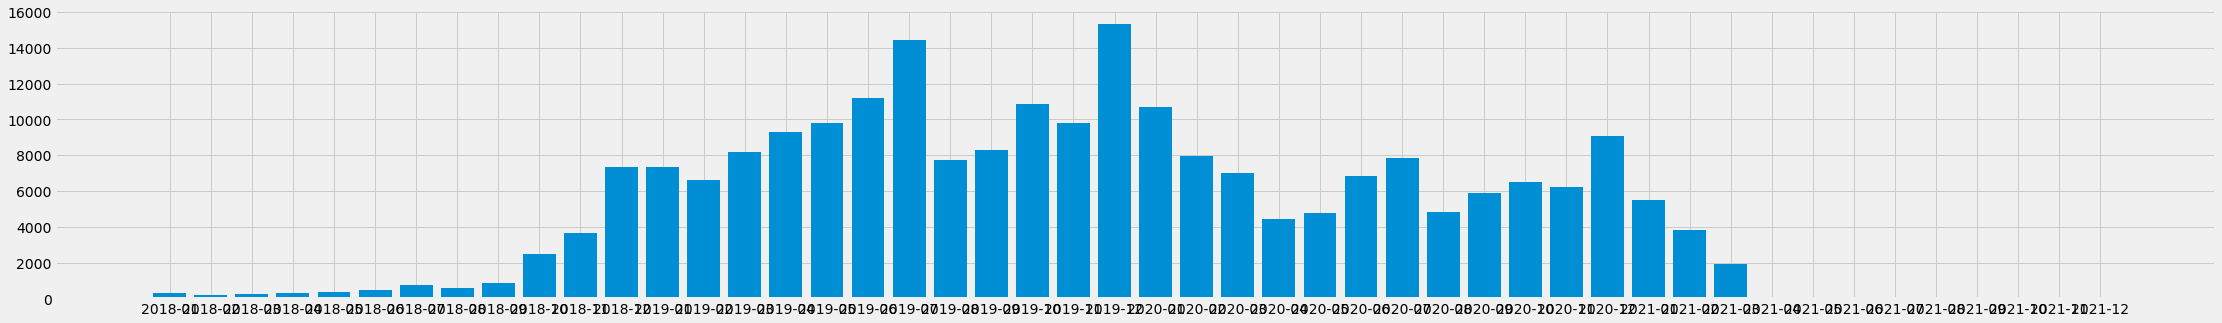

In [33]:
fig = plt.figure(figsize=(30,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(n_per_yearmonth.index, n_per_yearmonth.values);

- the number of contracts before 2019 is pretty low, which is consistent with the new directives on open data not yet rolled out.
- interestingly, we see a lot of seasonal variation with a peak of contracts being signed in december and july/august, which can be interpreted as people signing a contract to utilize the budget (december) and before the holidays (july/august)
- We will do more data visualization in ad-hoc dashboards

In [28]:
marches['datepublicationdonnees'] = pd.to_datetime(marches['datepublicationdonnees'])
marches['datepublicationdonnees'].describe()

count                  232644
unique                   1220
top       2020-04-07 00:00:00
freq                     1916
first     1980-11-22 00:00:00
last      2021-11-24 00:00:00
Name: datepublicationdonnees, dtype: object

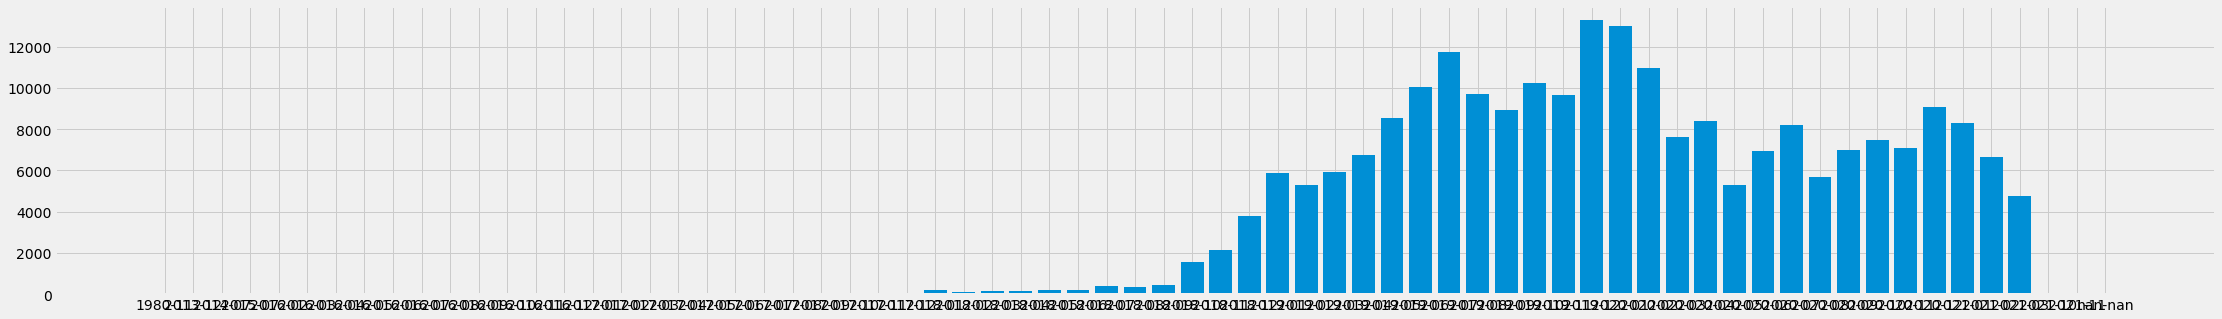

In [29]:
n_per_yearmonth2 = marches['datepublicationdonnees'].apply(convert_yearmonth).value_counts().sort_index()
fig = plt.figure(figsize=(30,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(n_per_yearmonth2.index, n_per_yearmonth2.values);

The data is published at regular intervals, tracking the peak in notification described above. It would be interesting to calculate the mean lag between notification and publication of the data